<a href="https://colab.research.google.com/github/happyrabbit/IntroDataScience/blob/master/Python/MINST_with_one_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01-Packages

Import packages for the notebook.

In [1]:
import numpy as np
import math
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

# 02-Load Data

Let's load the MINST data set. 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_width = X_train.shape[1]
img_height = X_train.shape[2]

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print('The shape of X_train is: ' + str(X_train.shape)) 
print('The shape of y_train is: ' + str(y_train.shape)) 
print('The shape of X_test is: ' + str(X_test.shape)) 
print('The shape of y_test is: ' + str(y_test.shape))
print('I have %d traning and %d testing examples!' %(X_train.shape[0], X_test.shape[0])) 

The shape of X_train is: (60000, 28, 28)
The shape of y_train is: (60000, 10)
The shape of X_test is: (10000, 28, 28)
The shape of y_test is: (10000, 10)
I have 60000 traning and 10000 testing examples!


Check some of the input images 

Label: [3]


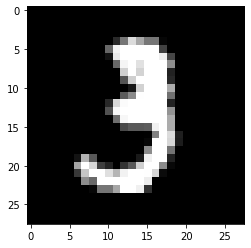

In [4]:
# assign the number of the image to show
img_id = 10
plt.imshow(X_train[img_id], cmap='gray')
print("Label: "+ str(np.where(y_train[img_id] ==1)[0]))

Scale and reshape the inputs and outputs.

In [5]:
# Scale the input
X_train = X_train / 255.
X_test = X_test / 255.

# Flatten the input
X_train = np.array([X_train[i].flatten() for i in range(0,X_train.shape[0])])
X_test = np.array([X_test[i].flatten() for i in range(0,X_test.shape[0])])

# Reshape the input and output
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

print('The shape of X_train is: ' + str(X_train.shape)) 
print('The shape of y_train is: ' + str(y_train.shape)) 
print('The shape of X_test is: ' + str(X_test.shape)) 
print('The shape of y_test is: ' + str(y_test.shape))

The shape of X_train is: (784, 60000)
The shape of y_train is: (10, 60000)
The shape of X_test is: (784, 10000)
The shape of y_test is: (10, 10000)


# 03-One Hidden Layer Neural Network
<center><img src="https://raw.githubusercontent.com/happyrabbit/course2020/master/slides/02DeepLearning/DNN/images/1hiddenexp.png" width="700"/></center>


## 03.1-Defining the neural network structure

- `n_x` -- the size of the input layer
- `n_h` -- the size of the hidden layer
- `n_y` -- the size of the output layer


## 03.2- Initialize the model's parameters

- Initialize the weights matrices, $W_1$ and $W_2$, with random values.
- Initialize the bias vectors, $b_1$ and $b_2$, as zeros.

In [6]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
        
    W1 = np.random.randn(n_h, n_x) * 0.001
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.001
    b2 = np.zeros(shape=(n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## 03.3-Defining Activation Functions and the Gradients

![](https://raw.githubusercontent.com/happyrabbit/course2020/master/slides/02DeepLearning/DNN/images/activation.png)

In [7]:
def ReLU(Z1):
    """
    Argument:
    Z1 -- the input of hidden layer activation function
    
    Returns:
    A1 -- activations from the hidden layer
    """
    A1 = np.maximum(Z1, 0)
    return A1

def ReLU_dev(Z1):
    """
    Argument:
    Z1 -- the input of hidden layer activation function
    
    Returns:
    dZ1 -- gradient of ReLU given input Z1
    """
    positive = Z1 > 0
    dZ1 = np.zeros(Z1.shape)
    dZ1[positive] = 1
    return dZ1

def softmax(Z2):
    """
    Argument:
    Z2 -- the input of output layer activation function
    
    Returns:
    A2 -- activations from the hidden layer
    """
    exp_scores = np.exp(Z2 - Z2.max(axis = 0, keepdims=True))
    A2 = exp_scores / exp_scores.sum(axis = 0, keepdims=True)
    return A2

## 03.4-Loss and Accuracy


In [8]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (10, number of examples)
    Y -- "true" labels vector of shape (10, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    m = Y.shape[1] # number of example
    # Retrieve W1 and W2 from parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y)
    cost = - np.sum(logprobs) / m
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    return cost

## 03.5-Forward Propagation

Forward and backward propagation.

![](https://raw.githubusercontent.com/happyrabbit/course2020/master/slides/02DeepLearning/DNN/images/1hiddenfb_math.png)

In [9]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    
    assert(A2.shape == (10, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## 03.6-Backward Propagation

In [10]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (784, number of examples)
    Y -- "true" labels vector of shape (10, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    Z2 = cache['Z2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), ReLU_dev(Z1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [11]:
def update_parameters(parameters, grads, learning_rate= 0.1, l2 = 0):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    learning_rate -- a number between 0 to 1
    l2 -- parameter for l2 penality, a number >= 0
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1'] + np.sum(l2*W1)
    db1 = grads['db1'] 
    dW2 = grads['dW2'] + np.sum(l2*W2)
    db2 = grads['db2'] 
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# 04-Optimization Methods


## 04.1-Stochastic Gradient Descent (SGD) 

In [ ]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False, learning_rate= 0.1, l2 = 0):
    """
    Arguments:
    X -- dataset of shape (784, number of examples)
    Y -- labels of shape (10, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    learning_rate -- a number between 0 to 1
    l2 -- parameter for l2 penality, a number >= 0
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    costs -- a list of cost per 100 interations
    """
    
    np.random.seed(1)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    costs = []
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate= learning_rate, l2 = l2)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
          print ("Cost after iteration %i: %f" % (i, cost))
        if i % 100 == 0:
          costs.append(cost)

    return parameters, costs

In [ ]:
# Build a model with a n_h-dimensional hidden layer
parameters, costs = nn_model(X_train, y_train, n_h = 4, num_iterations=10000, print_cost=True)

Cost after iteration 0: 2.302587
Cost after iteration 1000: 0.565407
Cost after iteration 2000: 0.499799
Cost after iteration 3000: 0.479786
Cost after iteration 4000: 0.466273
Cost after iteration 5000: 0.454446
Cost after iteration 6000: 0.444719
Cost after iteration 7000: 0.437433
Cost after iteration 8000: 0.431851
Cost after iteration 9000: 0.427439


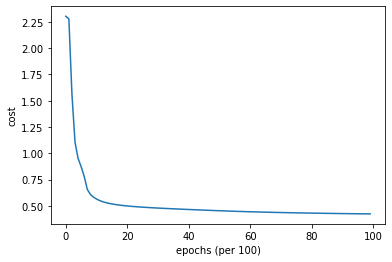

In [ ]:
# plot the cost
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('epochs (per 100)')
plt.show()

In [ ]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)

    predictions = np.argmax(A2, axis = 0)
    return predictions

In [ ]:
yhat_test = predict(parameters, X_test)
y = np.argmax(y_test, axis = 0)
np.mean(yhat_test == y)

0.873

## 04.2-Mini-Batch Gradient Descent

![](https://raw.githubusercontent.com/happyrabbit/course2020/master/slides/02DeepLearning/DNN/images/batchexp.png)

Let's update the parameters using mini-batches gradient descent.

In [12]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" of shape (10, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [34]:
def model(X, Y, n_h = 4,  learning_rate= 0.1, l2 = 0, mini_batch_size=64, num_epochs=20, print_cost=True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (784, number of examples)
    Y -- true "label" of shape (10, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    l2 -- l2 panalty parameter
    mini_batch_size -- the size of a mini batch
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters
    costs -- a list of cost per 100 epoch 
    """

    costs = []  # to keep track of the cost
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        minibatches = random_mini_batches(X, Y, mini_batch_size)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
            A2, cache = forward_propagation(X, parameters)
            
            # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
            cost = compute_cost(A2, Y, parameters)
            
            # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
            grads = backward_propagation(parameters, cache, X, Y)
 
            # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
            parameters = update_parameters(parameters, grads, learning_rate= learning_rate, l2 = l2)
        
        if print_cost:
            print("Cost after epoch %i: %f" % (i, cost))
        costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters, costs, dw1s

Cost after epoch 0: 0.613234
Cost after epoch 1: 0.517477
Cost after epoch 2: 0.479951
Cost after epoch 3: 0.456474
Cost after epoch 4: 0.442755
Cost after epoch 5: 0.434352
Cost after epoch 6: 0.428594
Cost after epoch 7: 0.424224
Cost after epoch 8: 0.420781
Cost after epoch 9: 0.417941
Cost after epoch 10: 0.415551
Cost after epoch 11: 0.416622
Cost after epoch 12: 0.416572
Cost after epoch 13: 0.415844
Cost after epoch 14: 0.414793
Cost after epoch 15: 0.413713
Cost after epoch 16: 0.412917
Cost after epoch 17: 0.412736
Cost after epoch 18: 0.411680
Cost after epoch 19: 0.409923


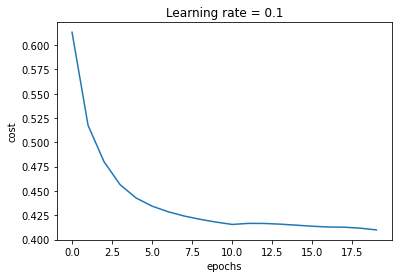

ValueError: ignored

In [35]:
parameters, costs = model(X_train, y_train, num_epochs=20)

In [ ]:
yhat_test = predict(parameters, X_test)
y = np.argmax(y_test, axis = 0)
np.mean(yhat_test == y)

0.8774

## 04.3-Momentum

Initialize the velocity for momentum optimization.

In [ ]:
def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", "dW2", "db2" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW1'] = velocity of dWl
                    v['db1'] = velocity of dbl
    """
    
    v = {}
    
    # Initialize velocity
    v["dW1"] = np.zeros_like(parameters["W1"])
    v["db1"] = np.zeros_like(parameters["b1"])
    v["dW2"] = np.zeros_like(parameters["W2"])
    v["db2"] = np.zeros_like(parameters["b2"])
    
    return v

Implement the parameters update with momentum. The momentum update rule is:

$$V_{dw} = \beta V_{dw}+(1-\beta)dw$$

$$V_{db} = \beta V_{db}+(1-\beta)db$$

$$w=w-\alpha V_{dw};\ \ b=b-\alpha V_{db}$$

In [ ]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients for each parameters
    v -- python dictionary containing the current velocity
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    # Momentum update for each parameter
    # compute velocities
    v["dW1"] = beta * v["dW1"] + (1 - beta) * grads['dW1']
    v["db1"] = beta * v["db1"] + (1 - beta) * grads['db1']
    v["dW2"] = beta * v["dW2"] + (1 - beta) * grads['dW2']
    v["db2"] = beta * v["db2"] + (1 - beta) * grads['db2']
    # update parameters
    parameters["W1"] = parameters["W1"] - learning_rate * v["dW1"]
    parameters["b1"] = parameters["b1"] - learning_rate * v["db1"]
    parameters["W2"] = parameters["W2"] - learning_rate * v["dW2"]
    parameters["b2"] = parameters["b2"] - learning_rate * v["db2"]
        
    return parameters, v

## 04.4-Adam

Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp and Momentum.

On iteration t, compute $dw$, $db$ using the current mini-batch.

$$\begin{cases} \begin{array}{c} V_{dw}=\beta_{1}V_{dw}+(1-\beta_{1})dw\\ V_{db}=\beta_{1}V_{db}+(1-\beta_{1})db \end{array} & momantum\ update\ \beta_{1}\end{cases}$$

$$\begin{cases} \begin{array}{c} S_{dw}=\beta_{2}S_{dw}+(1-\beta_{2})dw^{2}\\ S_{db}=\beta_{2}S_{db}+(1-\beta_{2})db^{2} \end{array} & RMSprop\ update\ \beta_{2}\end{cases}$$

$$\begin{cases} \begin{array}{c} V_{dw}^{corrected}=\frac{V_{dw}}{1-\beta_{1}^{t}}\\ V_{db}^{corrected}=\frac{V_{db}}{1-\beta_{1}^{t}} \end{array}\end{cases};\ \ \begin{cases} \begin{array}{c} S_{dw}^{corrected}=\frac{S_{dw}}{1-\beta_{2}^{t}}\\ S_{db}^{corrected}=\frac{S_{db}}{1-\beta_{2}^{t}} \end{array}\end{cases}$$

$$w=w-\alpha \frac{V_{dw}^{corrected}}{\sqrt{S_{dw}^{corrected}} +\epsilon};\ b=b-\alpha\frac{V_{db}^{corrected}}{\sqrt{S_{db}^{corrected}}+\epsilon}$$

where:

- $t$ counts the number of steps taken of Adam
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages.
- $\alpha$ is the learning rate
- $\epsilon$ is a very small number to avoid dividing by zero

As before, let's initialize the Adam variables $v, s$ which keep track of the past information.

In [ ]:
def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1","dW2", "db2" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
    """
    
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    v["dW1"] = np.zeros_like(parameters["W1"])
    v["db1"] = np.zeros_like(parameters["b1"])
    v["dW2"] = np.zeros_like(parameters["W2"])
    v["db2"] = np.zeros_like(parameters["b2"])

    s["dW1"] = np.zeros_like(parameters["W1"])
    s["db1"] = np.zeros_like(parameters["b1"])
    s["dW2"] = np.zeros_like(parameters["W2"])
    s["db2"] = np.zeros_like(parameters["b2"])

    return v, s

Now, implement the parameters update with Adam.

In [ ]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate=0.01,
                                beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing gradients for your parameters
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
    v["dW1"] = beta1 * v["dW1"] + (1 - beta1) * grads['dW1']
    v["db1"] = beta1 * v["db1"] + (1 - beta1) * grads['db1']
    v["dW2"] = beta1 * v["dW2"] + (1 - beta1) * grads['dW2']
    v["db2"] = beta1 * v["db2"] + (1 - beta1) * grads['db2']
        
    # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
    v_corrected["dW1"] = v["dW1"] / (1 - np.power(beta1, t))
    v_corrected["db1"] = v["db1"] / (1 - np.power(beta1, t))
    v_corrected["dW2"] = v["dW2"] / (1 - np.power(beta1, t))
    v_corrected["db2"] = v["db2"] / (1 - np.power(beta1, t))
       
    # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
    s["dW1"] = beta2 * s["dW1"] + (1 - beta2) * np.power(grads['dW1'], 2)
    s["db1"] = beta2 * s["db1"] + (1 - beta2) * np.power(grads['db1'], 2)
    s["dW2"] = beta2 * s["dW2"] + (1 - beta2) * np.power(grads['dW2'], 2)
    s["db2"] = beta2 * s["db2"] + (1 - beta2) * np.power(grads['db2'], 2)

    # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".

    s_corrected["dW1"] = s["dW1"] / (1 - np.power(beta2, t))
    s_corrected["db1"] = s["db1"] / (1 - np.power(beta2, t))
    s_corrected["dW2"] = s["dW2"] / (1 - np.power(beta2, t))
    s_corrected["db2"] = s["db2"] / (1 - np.power(beta2, t))

    # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
    parameters["W1"] = parameters["W1"] - learning_rate * v_corrected["dW1"] / np.sqrt(s_corrected["dW1"] + epsilon)
    parameters["b1"] = parameters["b1"] - learning_rate * v_corrected["db1"] / np.sqrt(s_corrected["db1"] + epsilon)
    parameters["W2"] = parameters["W2"] - learning_rate * v_corrected["dW2"] / np.sqrt(s_corrected["dW2"] + epsilon)
    parameters["b2"] = parameters["b2"] - learning_rate * v_corrected["db2"] / np.sqrt(s_corrected["db2"] + epsilon)

    return parameters, v, s

# 05-Model with different optimization algorithms

In [ ]:
def model(X, Y, n_h, optimizer, learning_rate= 0.1, mini_batch_size=64, beta=0.9,
          beta1=0.9, beta2=0.999, epsilon=1e-8, num_epochs= 20, print_cost=True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data
    Y -- true "label" vector
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost 

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    gradients = []                   # gradients per epoch
    n_x = X.shape[0]
    n_y = Y.shape[0]
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        minibatches = random_mini_batches(X, Y, mini_batch_size)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
            A2, cache = forward_propagation(X, parameters)
            
            # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
            cost = compute_cost(A2, Y, parameters)
           
           # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
            grads = backward_propagation(parameters, cache, X, Y)
            
            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        gradients.append([grads['dW1'], grads['dW2'], grads['db1'], grads['db2']])
        if print_cost:
            print("Cost after epoch %i: %f" % (i, cost))
            costs.append(cost)

                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters, costs, gradients

Cost after epoch 0: 0.584021
Cost after epoch 1: 0.517832
Cost after epoch 2: 0.497935
Cost after epoch 3: 0.486989
Cost after epoch 4: 0.479612
Cost after epoch 5: 0.474131
Cost after epoch 6: 0.469694
Cost after epoch 7: 0.466067
Cost after epoch 8: 0.462972
Cost after epoch 9: 0.460300
Cost after epoch 10: 0.457927
Cost after epoch 11: 0.455797
Cost after epoch 12: 0.453861
Cost after epoch 13: 0.452080
Cost after epoch 14: 0.450376
Cost after epoch 15: 0.448701
Cost after epoch 16: 0.447044
Cost after epoch 17: 0.445284
Cost after epoch 18: 0.443355
Cost after epoch 19: 0.441043


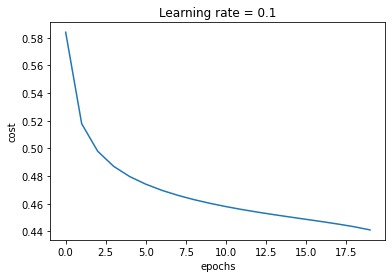

In [ ]:
parameters = model(X_train, y_train, n_h = 4, beta=0.9, optimizer="momentum")

Cost after epoch 0: 1.453199
Cost after epoch 1: 1.449830
Cost after epoch 2: 1.451291
Cost after epoch 3: 1.451958
Cost after epoch 4: 1.449140
Cost after epoch 5: 1.449319
Cost after epoch 6: 1.458471
Cost after epoch 7: 1.448479
Cost after epoch 8: 1.457921
Cost after epoch 9: 1.449281
Cost after epoch 10: 1.474954
Cost after epoch 11: 1.448607
Cost after epoch 12: 1.448502
Cost after epoch 13: 1.454827
Cost after epoch 14: 1.451984
Cost after epoch 15: 1.487578
Cost after epoch 16: 1.450886
Cost after epoch 17: 1.448374
Cost after epoch 18: 1.456553
Cost after epoch 19: 1.455893


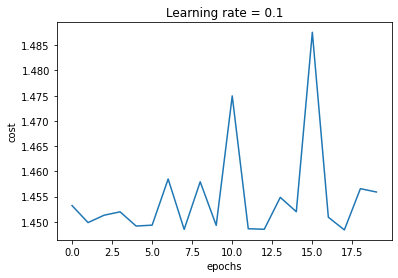

In [ ]:
parameters = model(X_train, y_train, learning_rate = 0.1, n_h = 4, optimizer="adam")

When $\beta_1 = 0$ , adam optimizer becomes RMSprop

Cost after epoch 0: 2.163012
Cost after epoch 1: 1.811483
Cost after epoch 2: 1.807051
Cost after epoch 3: 1.820496
Cost after epoch 4: 1.822814
Cost after epoch 5: 1.816322
Cost after epoch 6: 1.851430
Cost after epoch 7: 2.076641
Cost after epoch 8: 1.779753
Cost after epoch 9: 1.810285
Cost after epoch 10: 1.772520
Cost after epoch 11: 1.797026
Cost after epoch 12: 1.921602
Cost after epoch 13: 2.113433
Cost after epoch 14: 1.994257
Cost after epoch 15: 1.796781
Cost after epoch 16: 1.840291
Cost after epoch 17: 1.847565
Cost after epoch 18: 1.849388
Cost after epoch 19: 1.825749


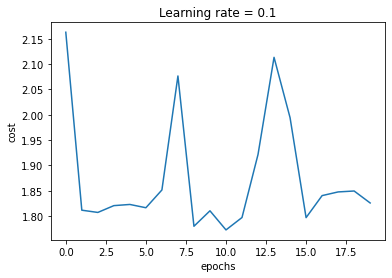

In [ ]:
parameters = model(X_train, y_train, n_h = 4, learning_rate= 0.1, mini_batch_size=64, beta=0.9,
          beta1=0, beta2=0.9, optimizer="adam")

Cost after epoch 0: 0.605447
Cost after epoch 1: 0.485888
Cost after epoch 2: 0.455039
Cost after epoch 3: 0.437966
Cost after epoch 4: 0.426471
Cost after epoch 5: 0.419440
Cost after epoch 6: 0.414431
Cost after epoch 7: 0.411123
Cost after epoch 8: 0.409106
Cost after epoch 9: 0.406916
Cost after epoch 10: 0.405556
Cost after epoch 11: 0.404031
Cost after epoch 12: 0.402654
Cost after epoch 13: 0.401189
Cost after epoch 14: 0.399858
Cost after epoch 15: 0.398767
Cost after epoch 16: 0.397490
Cost after epoch 17: 0.396462
Cost after epoch 18: 0.395467
Cost after epoch 19: 0.394695


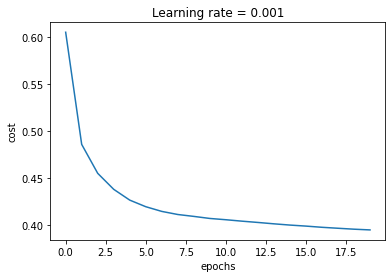

In [ ]:
parameters = model(X_train, y_train, n_h = 4,  mini_batch_size=128, learning_rate= 0.001,  beta=0.9,
          beta1=0, beta2=0.9, optimizer="adam")

Cost after epoch 0: 0.652625
Cost after epoch 1: 0.538039
Cost after epoch 2: 0.494766
Cost after epoch 3: 0.466445
Cost after epoch 4: 0.446931
Cost after epoch 5: 0.434147
Cost after epoch 6: 0.424947
Cost after epoch 7: 0.418039
Cost after epoch 8: 0.412807
Cost after epoch 9: 0.408511
Cost after epoch 10: 0.404447
Cost after epoch 11: 0.401307
Cost after epoch 12: 0.399088
Cost after epoch 13: 0.397500
Cost after epoch 14: 0.396359
Cost after epoch 15: 0.395433
Cost after epoch 16: 0.394425
Cost after epoch 17: 0.392661
Cost after epoch 18: 0.389971
Cost after epoch 19: 0.387413


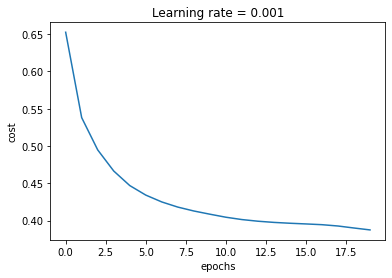

In [ ]:
parameters = model(X_train, y_train, learning_rate = 0.001, mini_batch_size=128, n_h = 4, optimizer="adam")